In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from transformers import pipeline
from textblob import TextBlob
from bertopic import BERTopic
import nltk
from nltk.corpus import stopwords
import re
import seaborn as sns
from tqdm import tqdm
# Style use.
sns.set_style('darkgrid')



c:\Users\mbial\miniconda3\envs\nkobo\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
nltk.download('stopwords')
stop_words = set(stopwords.words('french'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mbial\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
len(stop_words)

157

In [5]:
for i in ["le", "mr", "eto", "qu", "est", "c'est","qu", "juste", "master", "class", "toujours", "vraiment","si", "quand", "jai","j'ai", "beaucoup","déjà", "deja", "nest","n'est", "franchement", "cet", "vois", "ceux","ici", "mme","quil", "qu'il","trs","cette", "très", "trop", "cest",  "c'est","comme", "tout", "plus", "bien", "faire", "aussi", "fait", "peut", "tre","très","quel", "sans", "autre", "donc", "tous", "faut", "peu", "dit", "avoir", "non", "fois", "ans", "alors", "sont", "peu", "peux", "peut", "cest","c'est"]:
    stop_words.add(i)

In [6]:
df = pd.read_csv('comments.csv')
print(df.shape)
df.head()

(1183, 1)


,0
0,J'ai adoré cette phrase d'Eto'o '' Ce ne sont ...
1,Aurélien après ta carrière tu feras un bon jou...
2,Les anecdotes de Eto’o sont trois fois plus lo...
3,Arrêttons nous un instant pour apprécier la qu...
4,C’est la première fois de ma vie que je regard...


In [7]:
comments = df[df.columns[0]].values


# 1. preprocessing step

In [10]:
from tqdm import tqdm

In [27]:
def preprocess_comments(comments):
    cleaned_comments = []
    new_comments = []
    for comment in tqdm(comments):
        try:
            tmp = comment
            comment = re.sub(r'http\S+', '', comment)  # Remove URLs
            #comment = re.sub(r'[^A-Za-z0-9\s]+', '', comment)  # Remove special characters
            comment = comment.lower()  # Convert to lowercase
            comment = ' '.join([word for word in comment.split() if word not in stop_words])  # Remove stop words
            cleaned_comments.append(comment)
            new_comments.append(tmp)
        except:
            print(comment)
    return cleaned_comments, new_comments

In [28]:
cleaned_comments, new_comments = preprocess_comments(comments)

100%|██████████| 1183/1183 [00:00<00:00, 210239.47it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan


In [29]:
len(set(cleaned_comments))

1132

In [22]:
print(cleaned_comments[24])

respect grand frre samuel etoo parce grand frre impressionnant respect chacun sait couter sait couter mission tait captivante expriences projets tire leons


# 2. Wordcloud

In [30]:
def generate_word_cloud(comments):
    text = ' '.join(comments)
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50, min_word_length=4).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

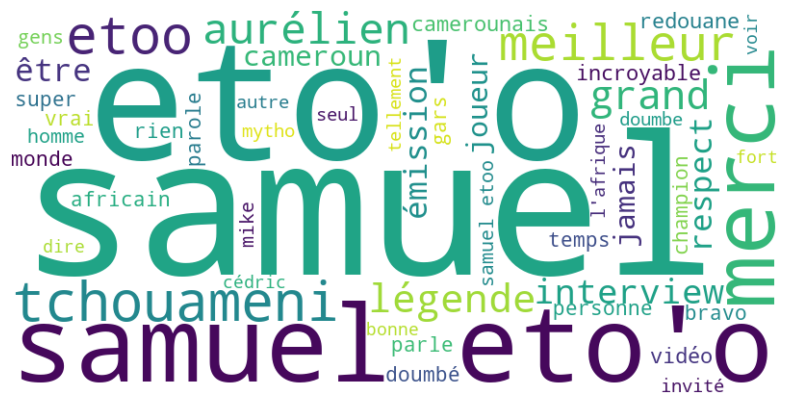

In [31]:
generate_word_cloud(cleaned_comments)

# 2. Topic modelling

In [32]:
from sentence_transformers import SentenceTransformer

In [ ]:

sentence_model = SentenceTransformer("dangvantuan/sentence-camembert-base")



In [35]:
# Step 6: Extract Main Topics with BERTopic
def extract_topics_bertopic(comments, sentence_model=sentence_model):
    topic_model = BERTopic( n_gram_range=(1, 3), embedding_model=sentence_model,  min_topic_size=5, language="french")
    topics, probs = topic_model.fit_transform(comments)
    return topic_model

In [36]:
topic_model = extract_topics_bertopic(cleaned_comments)

In [37]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,371,-1_eto_samuel_qu_grand,"[eto, samuel, qu, grand, est, être, samuel eto...","[quelle interview, champions, domaines différe..."
1,0,49,0_samuel eto_samuel_eto_eto samuel,"[samuel eto, samuel, eto, eto samuel, samuel e...","[légende samuel eto'o ️, samuel eto'o, légende..."
2,1,39,1_travail_redouane_up_masterclass,"[travail, redouane, up, masterclass, fort, 11,...","[49:17 quelle entrée, redouane éclaté sol . ma..."
3,2,39,2_tchouameni_bon présentateur_doumbe tchouamen...,"[tchouameni, bon présentateur, doumbe tchouame...","[aurélien tchouameni ️, i dont like the way tc..."
4,3,32,3_inter_jamais_mi_mi temps,"[inter, jamais, mi, mi temps, temps, triplé, m...",[eto'o s'invente vie mdr n'a jamais marqué tri...
5,4,30,4_mort_excellent_merci excellent_pleure,"[mort, excellent, merci excellent, pleure, vid...","[vidéo siècle, légende mort, "" arrivé annngles..."
6,5,28,5_mytho_samuel mytho_prédateur_eto mytho,"[mytho, samuel mytho, prédateur, eto mytho, gr...","[samuel eto'o mytho ,, etoo gros mytho, samuel..."
7,6,24,6_eto_touche eto_eto eto continent_touche eto eto,"[eto, touche eto, eto eto continent, touche et...","[touche eto'o, eto'o continent, touche eto'o, ..."
8,7,24,7_eto eto_eto_eto eto eto_eto power eto,"[eto eto, eto, eto eto eto, eto power eto, mei...","[eto'o, eto'o, eto’o sort droit blue lock]"
9,8,23,8_interview_réunion_belle interview_30,"[interview, réunion, belle interview, 30, inte...",[eto'o rien debut relancer interview mythique ...


In [39]:
topic_model.visualize_barchart(n_words=10, topics=[1,2,3,4,5, ], height=300, width=300)

In [40]:
topic_model.visualize_heatmap()

## Amélioration du BERT Topic

In [41]:
from bertopic.vectorizers import ClassTfidfTransformer
from hdbscan import HDBSCAN
from umap import UMAP

In [42]:
dim_reduction_model = UMAP(
 n_neighbors=10,
 n_components=50,
 min_dist=0.0,
 metric="cosine",
 random_state=42,
 )

In [54]:
clustering_model = HDBSCAN(
 min_cluster_size=10,
 metric="euclidean",
 cluster_selection_method="eom",
 prediction_data=True,
)

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
ctfidf_model = ClassTfidfTransformer(
 bm25_weighting = False,
 reduce_frequent_words = False,
 # seed_words = None,
 # seed_multiplier = 2,
 )

In [56]:
topic_model = BERTopic(
    n_gram_range=(1, 3), 
    embedding_model=sentence_model,  
    min_topic_size=5, 
    language="french",
    umap_model=dim_reduction_model,
    hdbscan_model=clustering_model,
    ctfidf_model=ctfidf_model,
    
)


In [57]:
topics, probs = topic_model.fit_transform(cleaned_comments)

In [58]:
topic_model.visualize_barchart(n_words=10, topics=[1,2,3,4,5, ], height=300, width=300)

In [59]:
topic_model.visualize_heatmap()

In [66]:
probs

array([0.15716368, 0.67439515, 0.76006356, ..., 0.5897419 , 0.6732139 ,
       0.        ])

In [62]:
infos_topics = topic_model.get_topic_info()
infos_topics.head()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,389,-1_eto_etoo_est_être,"[eto, etoo, est, être, samuel, ça, grand, qu, ...","[samiel grand monsieur icône, fecafoot penses ..."
1,0,127,0_samuel_orh_orh samuel_oh samuel,"[samuel, orh, orh samuel, oh samuel, oh, samue...","[orh samuel, orh samuel, samuel]"
2,1,66,1_samuel eto_samuel_eto_samuel etoo,"[samuel eto, samuel, eto, samuel etoo, eto sam...","[légende samuel eto'o ️, légende samuel eto'o ..."
3,2,52,2_tchouameni_tchouameni bon_animateur_tchouaméni,"[tchouameni, tchouameni bon, animateur, tchoua...","[aurélien tchouameni ️, i dont like the way tc..."
4,3,48,3_inter_jamais_mi_mi temps,"[inter, jamais, mi, mi temps, triplé, temps, m...",[eto'o s'invente vie mdr n'a jamais marqué tri...


In [69]:
print(infos_topics['Representation'].iloc[11])

['mytho', 'prédateur', 'eto mytho', 'samuel mytho', 'etoo', 'gros', 'parce', 'parce prédateur', 'prédateur mdr', 'mythoman eto']


In [72]:
from langchain.prompts.chat import (
    ChatPromptTemplate,
)

In [88]:
prompt = """
<|système|>
Tu es un agent qui permet de donner un titre à un ensemble de topic que l'utilisateur te donnera. Donne uniquement le titre comme réponse.

<|utilisateur|>
Topics :
{topics}


"""

In [77]:
from langchain.chat_models import ChatOpenAI

In [76]:
#!pip install langchain_community

In [80]:
#!pip install openai

In [ ]:
OPENAI_API_KEY = ""

eval_chat_model = ChatOpenAI(model="gpt-4-1106-preview", temperature=0, openai_api_key=OPENAI_API_KEY)
evaluator_name = "GPT4"

In [82]:
" ".join(infos_topics['Representation'].iloc[11])

'mytho prédateur eto mytho samuel mytho etoo gros parce parce prédateur prédateur mdr mythoman eto'

In [83]:
final_prompt = prompt.format(topics = " ".join(infos_topics['Representation'].iloc[11])
                             )
print(final_prompt)


<|système|>
Tu es un agent qui permet de donner un titre à un ensemble de topic que l'utilisateur te donnera.

<|utilisateur|>
Topics :
mytho prédateur eto mytho samuel mytho etoo gros parce parce prédateur prédateur mdr mythoman eto

Voici quelques exemples de réponse : 
1. Eloquence
2. Talent de Samuel Etoo
3. Aurelien bon présentateur 






In [92]:
infos_topics.head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,389,-1_eto_etoo_est_être,"[eto, etoo, est, être, samuel, ça, grand, qu, ...","[samiel grand monsieur icône, fecafoot penses ..."
1,0,127,0_samuel_orh_orh samuel_oh samuel,"[samuel, orh, orh samuel, oh samuel, oh, samue...","[orh samuel, orh samuel, samuel]"
2,1,66,1_samuel eto_samuel_eto_samuel etoo,"[samuel eto, samuel, eto, samuel etoo, eto sam...","[légende samuel eto'o ️, légende samuel eto'o ..."
3,2,52,2_tchouameni_tchouameni bon_animateur_tchouaméni,"[tchouameni, tchouameni bon, animateur, tchoua...","[aurélien tchouameni ️, i dont like the way tc..."
4,3,48,3_inter_jamais_mi_mi temps,"[inter, jamais, mi, mi temps, triplé, temps, m...",[eto'o s'invente vie mdr n'a jamais marqué tri...
5,4,41,4_ça_respect_parole_qu,"[ça, respect, parole, qu, celui, fin, moins, g...","["" veux joueur caractère, importe m'insulte, d..."
6,5,38,5_aurélien_aurelien_journaliste_bon,"[aurélien, aurelien, journaliste, bon, bravo, ...","[possible, aurélien reconvertis journalisme ap..."
7,6,38,6_redouane_travail_etoo_up,"[redouane, travail, etoo, up, plateau, masterc...","[redouane éclaté sol . marrant., etoo meilleur..."
8,7,33,7_eto_eto eto_touche eto_eto eto continent,"[eto, eto eto, touche eto, eto eto continent, ...","[touche eto'o, eto'o continent, touche eto'o, ..."
9,8,30,8_mort_excellent_vie_incroyable,"[mort, excellent, vie, incroyable, mort est vr...","[légende mort, jesus transformer vie, "" arrivé..."


In [91]:
for i in range(1, len(infos_topics)):
    final_prompt = prompt.format(topics = " ".join(infos_topics['Representation'].iloc[i]))
    answer = eval_chat_model.invoke(final_prompt)
    print(answer.content)


"Echoes of Samuel: A Repetitive Ode"
"Samuel Eto'o: Hommage à une Légende du Football"
"Tchouaméni et Eto'o : Éloquence et Présentation dans le Monde du Sport"
"Triomphe et Controverse: L'histoire d'un Match Mémorable"
"La Valeur de la Parole et l'Importance de la Fidélité aux Engagements"
"Le Parcours d'Aurélien : Du Journalisme à la Reconnaissance Professionnelle"
"Masterclass d'Eto'o: Travail, Développement et Excellence"
"Exploration des Thèmes Récurrents: Eto, Touche, et Continent"
"Le Cycle de la Vie et de la Mort: Excellence, Échecs et Résilience"
"Le Parcours de Cédric Doumbé : Le Meilleur Combattant Français"
"Les Variations Mythomanes de Samuel Eto'o"
"Les Multiples Facettes d'Eto: De l'Homme Libre au Maître Accompli"
"Des Conversations Captivantes : Écoute et Partage de Points de Vue Intéressants"
Cryptogramme Numérique : Séquence et Répétitions
"Stratégies et Impressions: Maîtriser l'Art de l'Interview"
"Samuel Eto'o: Légende Africaine et Symbole de Fierté"
"Superbes et Bel

# 4. sentiment analysis

In [93]:
def classify_comments(comments):
    classifier = pipeline('zero-shot-classification', model='facebook/bart-large-mnli')
    categories = ['positive', 'negative']
    classified_comments = []
    scores = []
    for comment in tqdm(comments):
        result = classifier(comment, candidate_labels=categories)
        classified_comments.append(result['labels'][0])
        scores.append(result['scores'][0])
    return classified_comments, scores

In [ ]:
classified_comments, scores = classify_comments(cleaned_comments)

  5%|▍         | 58/1174 [00:42<11:04,  1.68it/s]

In [172]:
df['sentiment'] = classified_comments
df["cleaned_comments"] = cleaned_comments
df["scores"] = scores
df.head()

,0,sentiment,cleaned_comments,scores
0,J'ai adoré cette phrase d'Eto'o '' Ce ne sont ...,negative,ador phrase detoo meilleurs font erreurs parce...,0.852327
1,Mr Eto'o fils samuel vous êtes une vraie Legen...,positive,etoo fils samuel vraie legende forever camerou...,0.890573
2,Aurélien après ta carrière tu feras un bon jou...,positive,aurlien aprs carrire feras bon journaliste mat...,0.816347
3,Impressionné par Aurelien dans son rôle qui ma...,positive,impressionn aurelien rle matrise sens dune mai...,0.996912
4,Sans des sportifs comme Eto'o le sport ne sera...,negative,sportifs etoo sport passion incroyable,0.994974


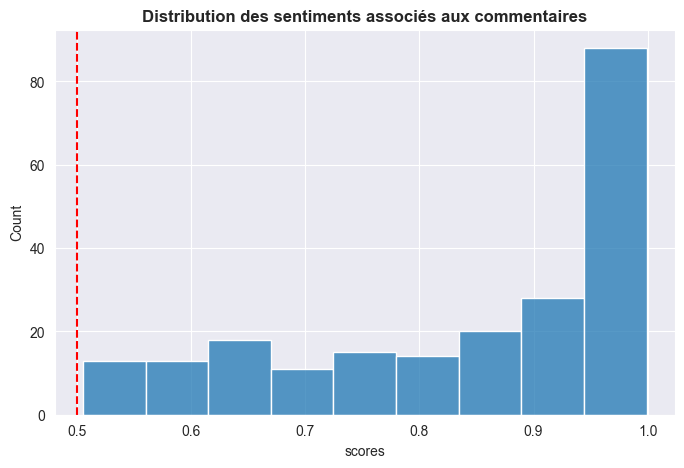

In [223]:
plt.figure(figsize=(8, 5))
plt.rcParams.update({'legend.fontsize': 10})
sns.histplot(df["scores"])
#add a line plot x=1
plt.axvline(x=0.5, color='r', linestyle='--')
plt.title("Distribution des sentiments associés aux commentaires", weight="bold", size=12);

In [212]:
for c in df[ df["cleaned_comments"].str.contains("garoua") ][df.columns[0]].values:
    print(c)

Qui est ici grâce à facebook comme moi .
Bravo SAMUEL GAROUA.
Qui est ici grâce à facebook. 
Est ce que les hiboux voyent le fauteuil de SAMUEL ETO'O. 
TOUS À GAROUA


In [220]:
for c in df[df.columns[0]]:
    u = c.split('Pasteur')
    if len(u) > 1:
        print(c)

False

In [211]:
for c in df[ df[df.columns[0]].str.contains("Garoua") ][df.columns[0]].values:
    print(c)

In [181]:
# select comments with a score greater than 0.5
for c in df[df["scores"] > 0.99][df.columns[0]].values:
    print(c)

Impressionné par Aurelien dans son rôle qui maîtrise à mon sens d’une main de maître… excellente émission
Sans des sportifs comme Eto'o le sport ne serait plus une passion. Il est juste incroyable.
Quand tu vois une vidéo pareille, tu as juste envie de te surpasser pour atteindre tes objectifs.
Masterclass messieurs !!
Fier d'être africain, trop fière d'être Camerounais 🇨🇲
Tchaouameni masterclass, verve, intelligence, un très bon animateur ! Quel classe et charisme.
Eto’o peut paraître arrogant parfois mais il était très fort, une légende africaine respect 🫡 depuis le Mali 🇲🇱 
Tchouameni  TRÈS TRÈS BON calme, posé, bravo !!!
Chapeau bas pour Aurélien qui a vraiment fait une masterclass!
Bravo Aurélien, je te découvre sous un autre angle. Tu gères tes intervenants avec la précision d'un match de football : un excellent timing pour distribuer la parole, tout en affichant un charisme impressionnant. Félicitations !
Vrmt respect à vie à etoo très agréable qd il parle il explique énormément